In [1]:
import importlib
import time
import os
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import integrate
from scipy import interpolate
from scipy import optimize

In [2]:
from multi_loc import covariance, assimilate, utilities

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [5]:
save_dir = 'LM3_error_growth_cycle'
home = os.path.expanduser('~')
save_dir = os.path.join(
    home,
    'Documents/python_code/multi_loc/notebooks/',
    save_dir)

this_path = os.path.join(save_dir, 't_gt.npy')
t_gt = np.load(this_path)

In [6]:
cycle_dir = os.path.join(save_dir, 'identity')

this_path = os.path.join(cycle_dir, 'Z_ave_rmse.npy')
Z_ave_rmse_I = np.load(this_path)

this_path = os.path.join(cycle_dir, 'X_ave_rmse.npy')
X_ave_rmse_I = np.load(this_path)

this_path = os.path.join(cycle_dir, 'Y_ave_rmse.npy')
Y_ave_rmse_I = np.load(this_path)

cycle_dir = os.path.join(save_dir, 'correlated')

this_path = os.path.join(cycle_dir, 'Z_ave_rmse.npy')
Z_ave_rmse_C = np.load(this_path)

this_path = os.path.join(cycle_dir, 'X_ave_rmse.npy')
X_ave_rmse_C = np.load(this_path)

this_path = os.path.join(cycle_dir, 'Y_ave_rmse.npy')
Y_ave_rmse_C = np.load(this_path)

In [7]:
Zc_ave_rmse_I = Z_ave_rmse_I.mean(axis=0)
Xc_ave_rmse_I = X_ave_rmse_I.mean(axis=0)
Yc_ave_rmse_I = Y_ave_rmse_I.mean(axis=0)

Zc_ave_rmse_C = Z_ave_rmse_C.mean(axis=0)
Xc_ave_rmse_C = X_ave_rmse_C.mean(axis=0)
Yc_ave_rmse_C = Y_ave_rmse_C.mean(axis=0)

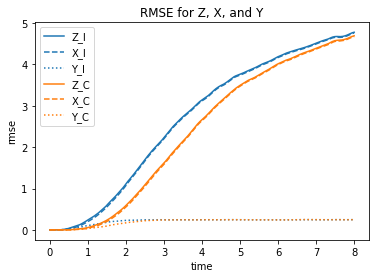

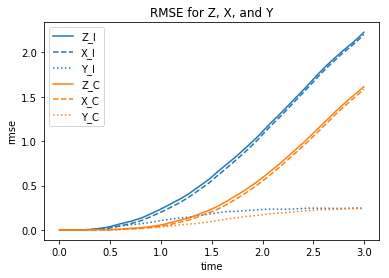

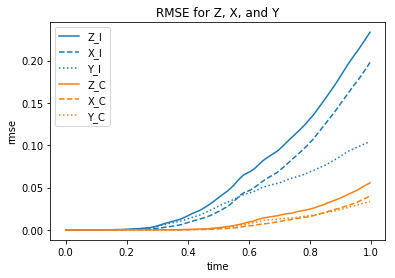

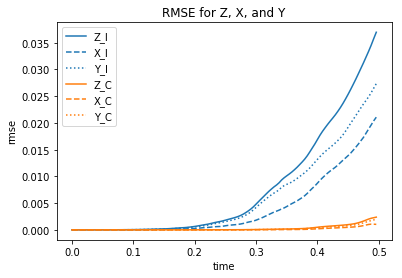

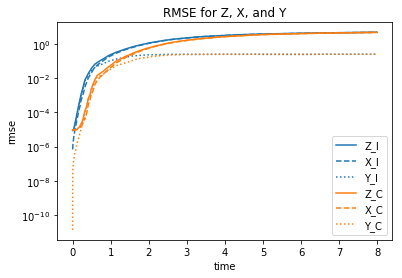

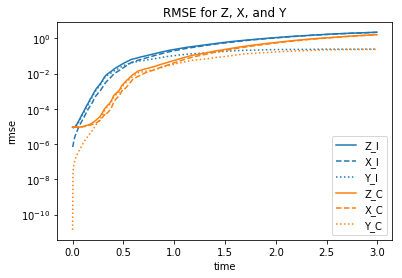

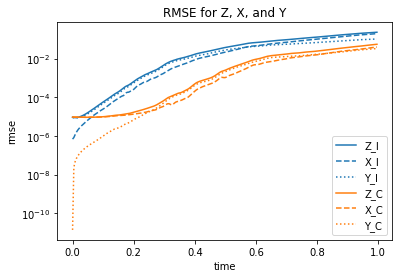

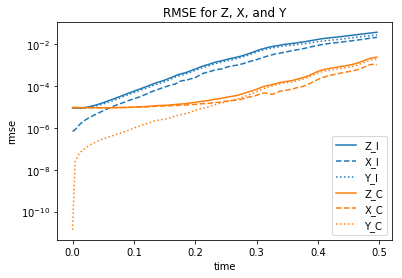

In [8]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])



time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index], linestyle='-', color='C0')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index], linestyle='--', color='C0')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index], linestyle=':', color='C0')
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index], linestyle='-', color='C1')
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index], linestyle='--', color='C1')
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index], linestyle=':', color='C1')
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z_I', 'X_I', 'Y_I',
            'Z_C', 'X_C', 'Y_C'])

In [9]:
# for Uncorrelated

In [10]:
log_Z_I = np.log10(Zc_ave_rmse_I)
log_X_I = np.log10(Xc_ave_rmse_I)
log_Y_I = np.log10(Yc_ave_rmse_I)

smoothing = 20
dt = t_gt[1] - t_gt[0]
D_log_Z_I = np.gradient(log_Z_I, dt)
D_log_Z_Ism = ndimage.uniform_filter1d(D_log_Z_I, smoothing)

D_log_X_I = np.gradient(log_X_I, dt)
D_log_X_Ism = ndimage.uniform_filter1d(D_log_X_I, smoothing)

D_log_Y_I = np.gradient(log_Y_I, dt)
D_log_Y_Ism = ndimage.uniform_filter1d(D_log_Y_I, smoothing)


smoothing2 = 100

D_log_Z_Ism2 = ndimage.uniform_filter1d(D_log_Z_I, smoothing2)
D_log_X_Ism2 = ndimage.uniform_filter1d(D_log_X_I, smoothing2)
D_log_Y_Ism2 = ndimage.uniform_filter1d(D_log_Y_I, smoothing2)

Text(0, 0.5, 'derivative')

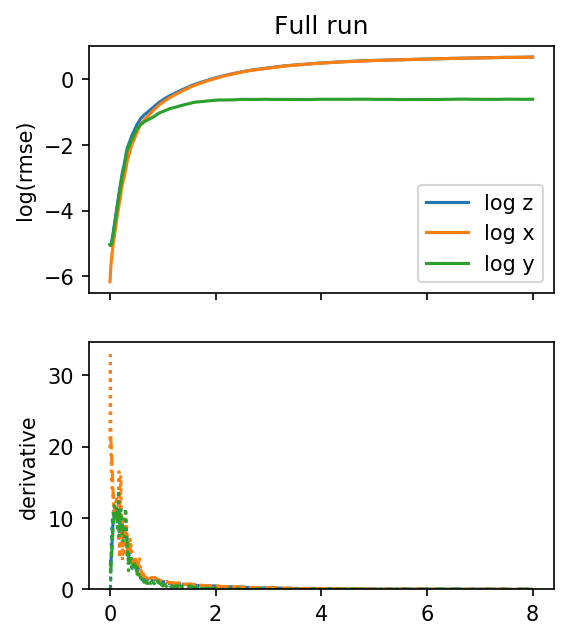

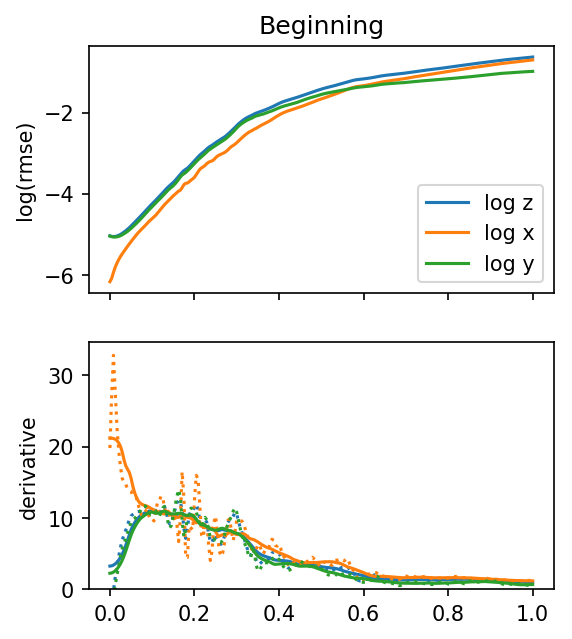

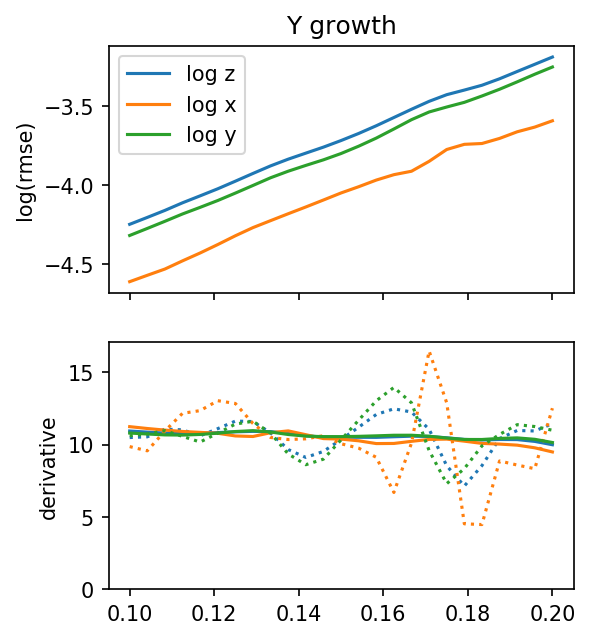

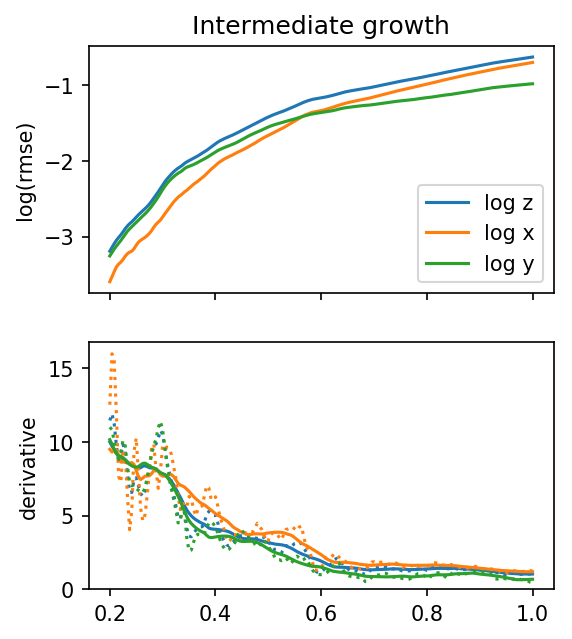

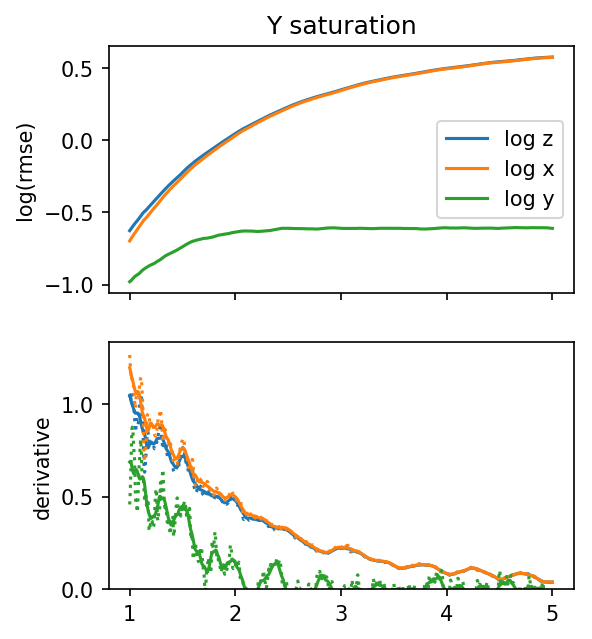

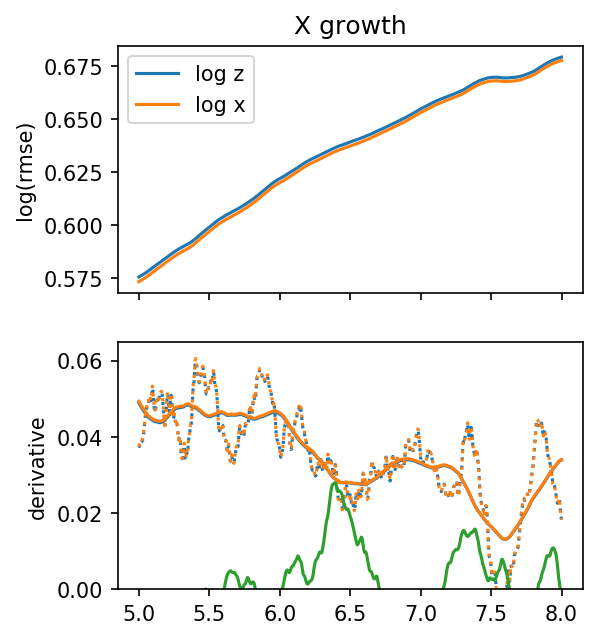

In [11]:
time0 = 0
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Full run')


ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2', linestyle='--')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])


time0 = 0
time1 = 1

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Beginning')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 0.1
time1 = 0.2

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)
y_growth_slice_I = slice_plot

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])



time0 = 0.2
time1 = 1

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 1
time1 = 5

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y saturation')

ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 5
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

x_growth_slice_I = slice_plot


figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_I[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_I[slice_plot], color='C1')
# ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('X growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_I[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Ism2[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_I[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Ism2[slice_plot], color='C1')
# ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Ism2[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

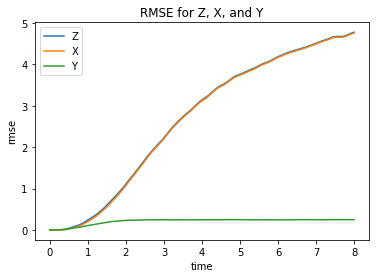

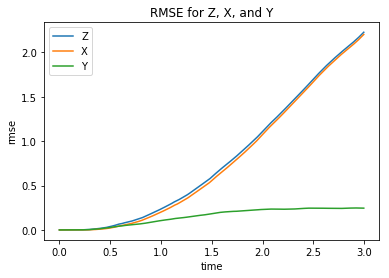

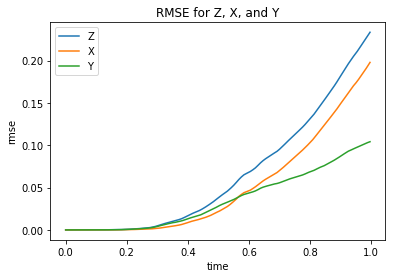

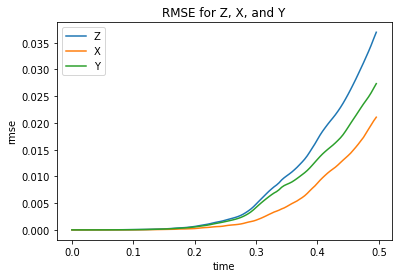

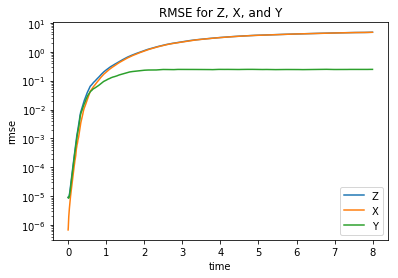

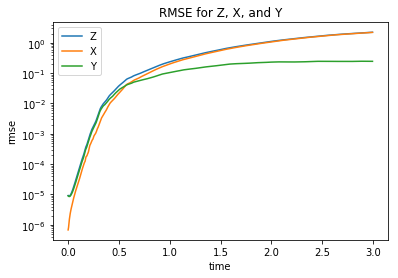

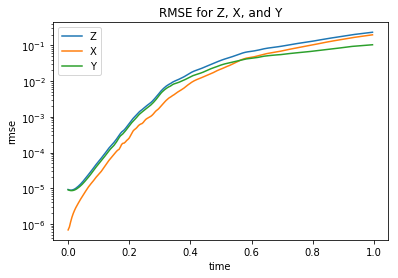

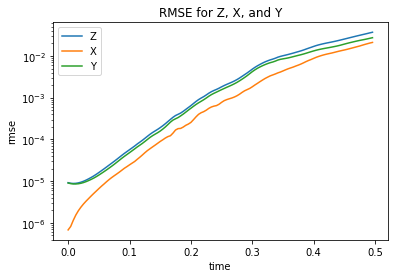

In [12]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_I[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_I[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

Text(0.5, 1.0, 'RMSE for Y')

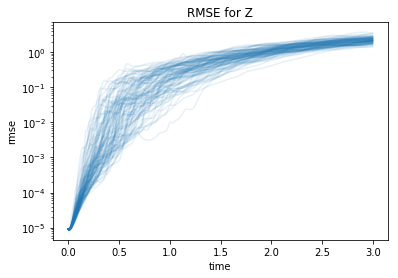

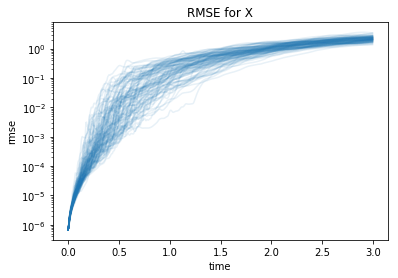

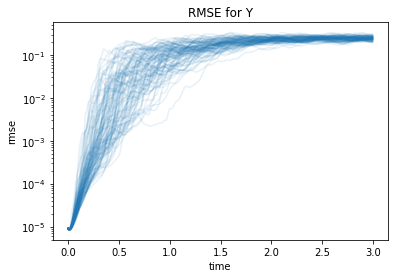

In [13]:
time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Z_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], X_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for X')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Y_ave_rmse_I[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Y')

In [14]:
# for Correlated

In [15]:
log_Z_C = np.log10(Zc_ave_rmse_C)
log_X_C = np.log10(Xc_ave_rmse_C)
log_Y_C = np.log10(Yc_ave_rmse_C)

smoothing = 20
dt = t_gt[1] - t_gt[0]
D_log_Z_C = np.gradient(log_Z_C, dt)
D_log_Z_Csm = ndimage.uniform_filter1d(D_log_Z_C, smoothing)

D_log_X_C = np.gradient(log_X_C, dt)
D_log_X_Csm = ndimage.uniform_filter1d(D_log_X_C, smoothing)

D_log_Y_C = np.gradient(log_Y_C, dt)
D_log_Y_Csm = ndimage.uniform_filter1d(D_log_Y_C, smoothing)


smoothing2 = 100

D_log_Z_Csm2 = ndimage.uniform_filter1d(D_log_Z_C, smoothing2)
D_log_X_Csm2 = ndimage.uniform_filter1d(D_log_X_C, smoothing2)
D_log_Y_Csm2 = ndimage.uniform_filter1d(D_log_Y_C, smoothing2)

Text(0, 0.5, 'derivative')

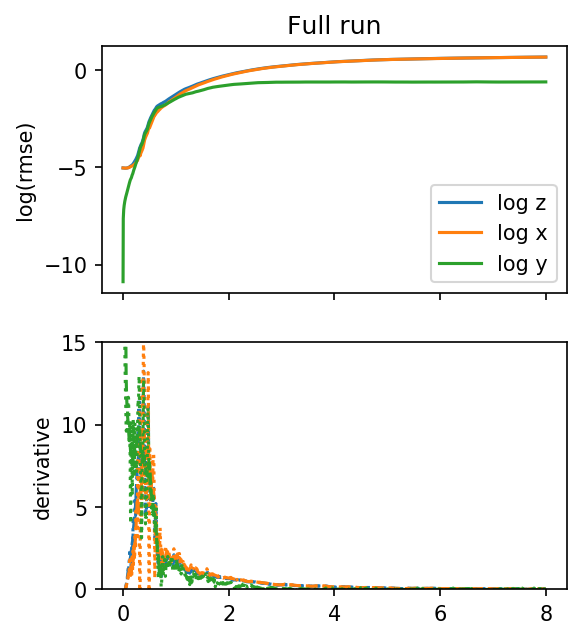

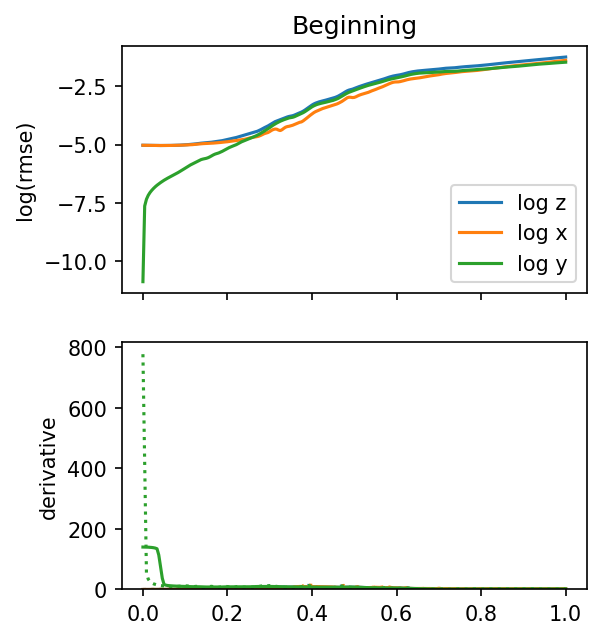

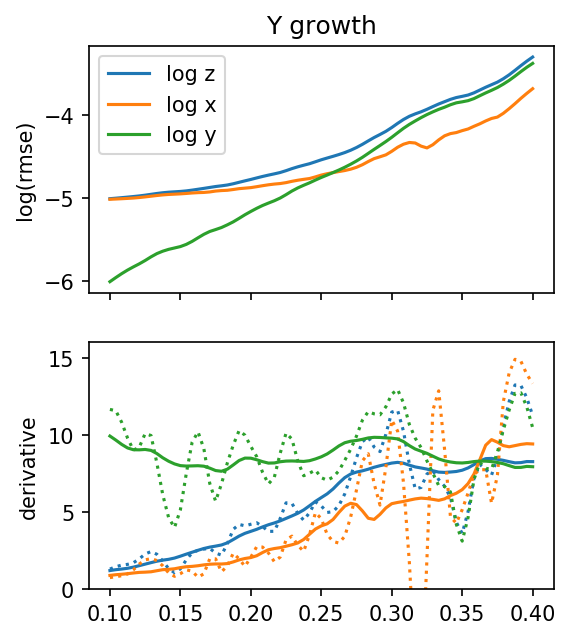

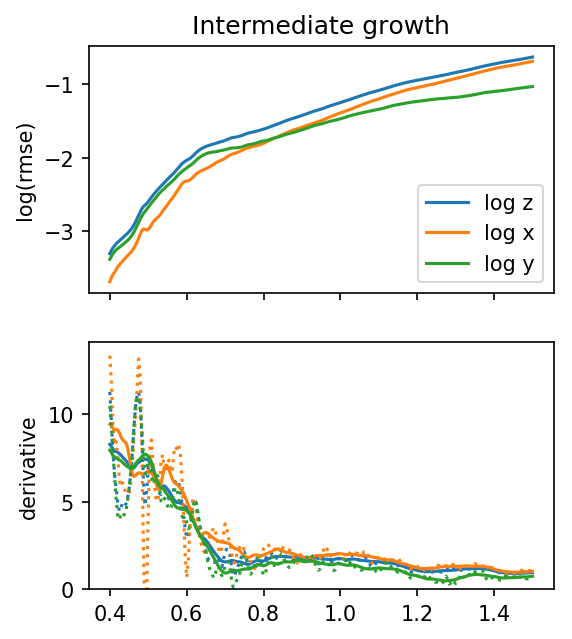

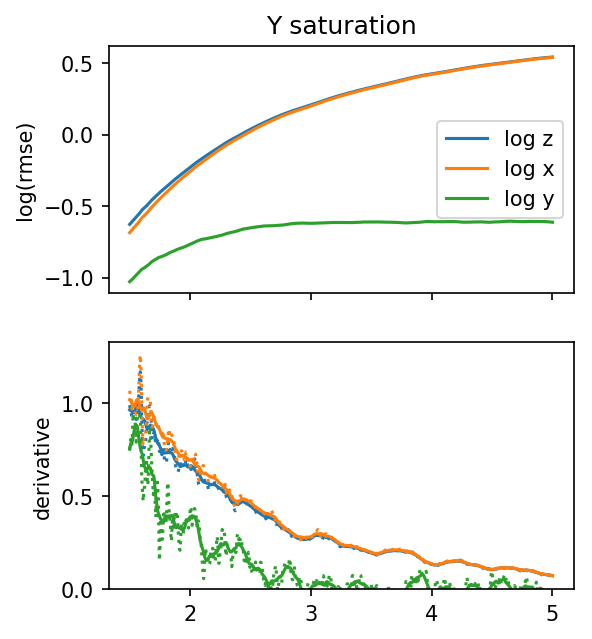

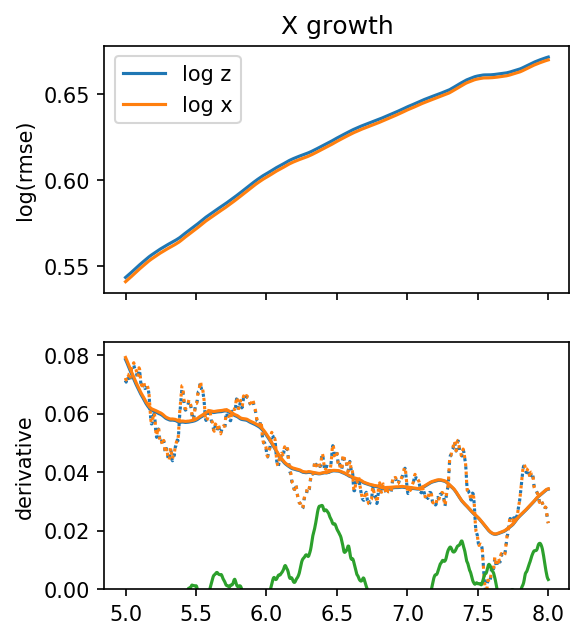

In [16]:
time0 = 0
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Full run')


ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1', linestyle='--')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2', linestyle='--')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
ax[1].set_ylim([0, 15])
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 0
time1 = 1

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Beginning')

ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 0.1
time1 = 0.4

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 0.4
time1 = 1.5

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Intermediate growth')

ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 1.5
time1 = 5

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
ax[0].plot(t_gt[slice_plot], log_Y_C[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('Y saturation')

ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm[slice_plot], color='C1')
ax[1].plot(t_gt[slice_plot], D_log_Y_C[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

time0 = 5
time1 = 8

start = np.abs(t_gt - time0).argmin()
stop = np.abs(t_gt - time1).argmin()
slice_plot = slice(start, stop + 1)

figsize = plt.figaspect(1.2)
fig, ax = plt.subplots(nrows=2, sharex=True, dpi=150, figsize=figsize)
ax[0].plot(t_gt[slice_plot], log_Z_C[slice_plot], color='C0')
ax[0].plot(t_gt[slice_plot], log_X_C[slice_plot], color='C1')
# ax[0].plot(t_gt[slice_plot], log_Y_I[slice_plot], color='C2')
ax[0].legend(['log z', 'log x', 'log y'])
ax[0].set_ylabel('log(rmse)')
ax[0].set_title('X growth')


ax[1].plot(t_gt[slice_plot], D_log_Z_C[slice_plot], color='C0', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Z_Csm2[slice_plot], color='C0')
ax[1].plot(t_gt[slice_plot], D_log_X_C[slice_plot], color='C1', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_X_Csm2[slice_plot], color='C1')
# ax[1].plot(t_gt[slice_plot], D_log_Y_I[slice_plot], color='C2', linestyle=':')
ax[1].plot(t_gt[slice_plot], D_log_Y_Csm2[slice_plot], color='C2')
ax[1].set_ylim([0, None])
ax[1].set_ylabel('derivative')
# ax[1].legend(['z', 'z sm',
#               'x', 'x sm',
#               'y', 'y sm'])

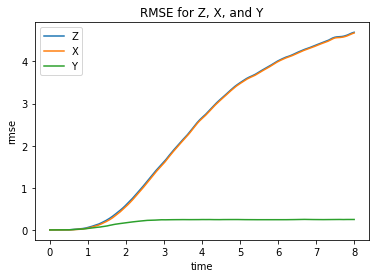

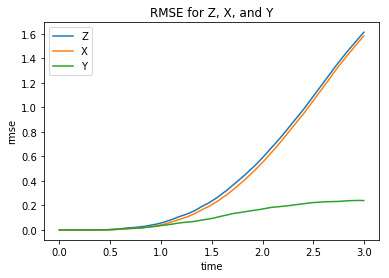

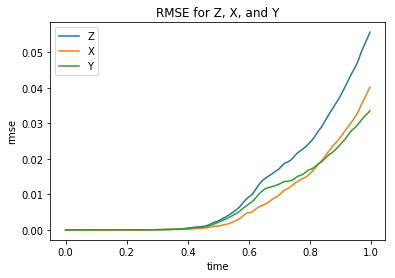

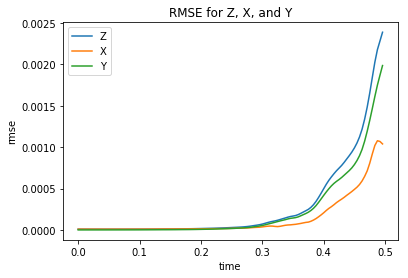

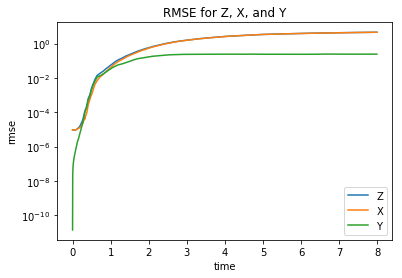

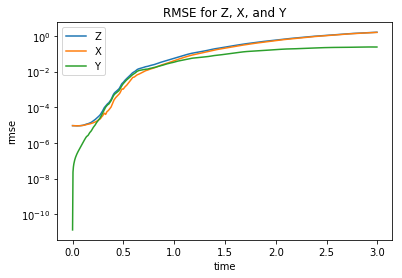

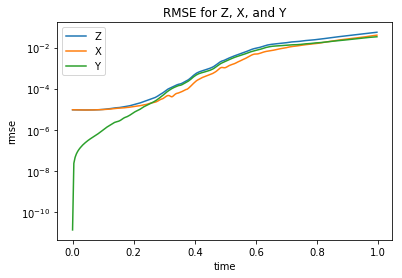

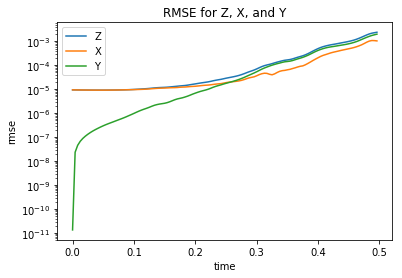

In [17]:
time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.plot(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.plot(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 8
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 1
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

time = 0.5
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Zc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Xc_ave_rmse_C[:this_index])
plt.semilogy(t_gt[:this_index], Yc_ave_rmse_C[:this_index])
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z, X, and Y')
plt.legend(['Z', 'X', 'Y'])

Text(0.5, 1.0, 'RMSE for Y')

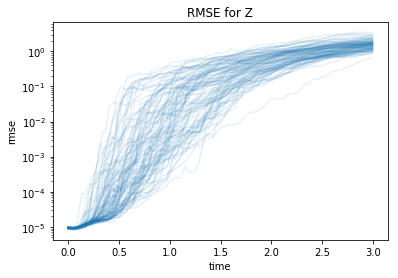

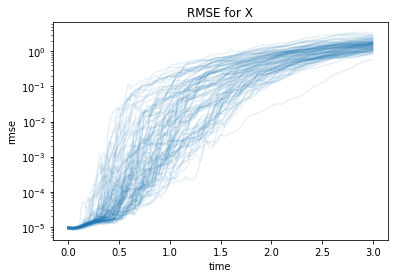

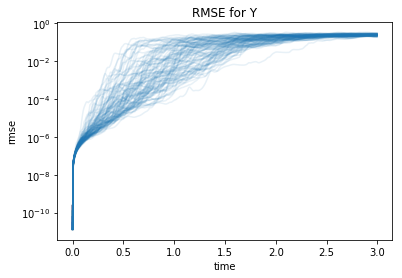

In [18]:
time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Z_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Z')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], X_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for X')

time = 3
this_index = np.abs(t_gt - time).argmin()
plt.figure()
plt.semilogy(t_gt[:this_index], Y_ave_rmse_C[:, :this_index].T, color='C0', alpha=0.1)
plt.ylabel('rmse')
plt.xlabel('time')
plt.title('RMSE for Y')